# Matrix Multiplication

This notebook has been translated from [ImageJ Macro](https://clij.github.io/clij2-docs/md/spots_pointlists_matrices_tables/)

It shows how to operate on spot images, pointlists, distance matrices and touch matrices in the GPU.


## Initialize GPU

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

# initialize GPU
cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.274.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24183 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6045 MB
	Max Clock Frequency:         2520 MHz
	Image Support:               Yes

## Define a small array representing a spot detection result and push it to the GPU

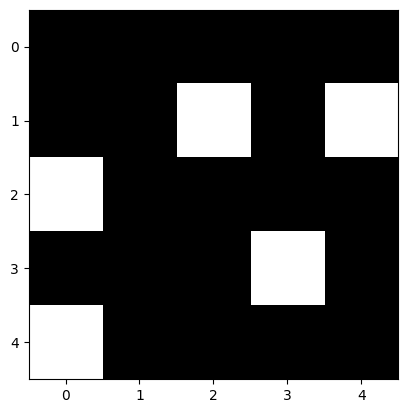

In [2]:
array = np.asarray(
    [
        [0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0]
    ]
)

spots_image = cle.push(array)

cle.imshow(spots_image)

## Convert the spot image into a point list

In [3]:
labeled_spots = cle.connected_components_labeling(spots_image)
pointlist = cle.create([3, 5])
cle.labelled_spots_to_pointlist(labeled_spots, pointlist)
pointlist

array([[2., 4., 0., 3., 0.],
       [1., 1., 2., 3., 4.],
       [0., 0., 0., 0., 0.]], dtype=float32, mtype=buffer)

## Determine the distance between all spots and write the result as distance matrix

In [4]:
distance_matrix = cle.generate_distance_matrix(pointlist, pointlist)
distance_matrix

array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ],
       [0.       , 0.       , 2.       , 2.2360678, 2.2360678, 3.6055512],
       [0.       , 2.       , 0.       , 4.1231055, 2.2360678, 5.       ],
       [0.       , 2.2360678, 4.1231055, 0.       , 3.1622777, 2.       ],
       [0.       , 2.2360678, 2.2360678, 3.1622777, 0.       , 3.1622777],
       [0.       , 3.6055512, 5.       , 2.       , 3.1622777, 0.       ]],
      dtype=float32, mtype=buffer)

## Blow labels up, until they touch (Voronoi diagram)

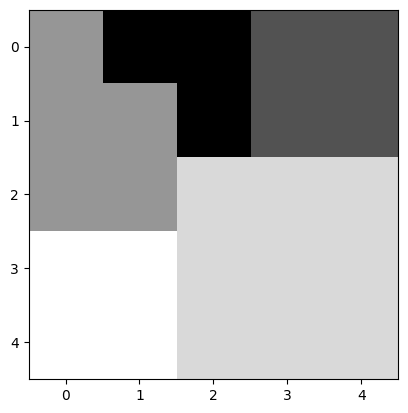

In [8]:
label_voronoi = cle.voronoi_labeling(spots_image)
cle.imshow(label_voronoi)

## Analyze touching labels and save it as a touch matrix

In [6]:
touch_matrix = cle.generate_touch_matrix(label_voronoi)
touch_matrix

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0, 1],
       [0, 0, 0, 1, 1, 0]], dtype=uint32, mtype=buffer)

## Count neighbors for every touching node

In [7]:
count_vector = cle.create([6, 1])
cle.sum_x_projection(touch_matrix, count_vector)

array([[0.],
       [3.],
       [2.],
       [3.],
       [4.],
       [2.]], dtype=float32, mtype=buffer)